- Machine Learning - A subset of AI that uses predictive modelling to "train" computers
- Supervised Machine Learning - Machine learning where humans provide the labels and define the outputs as "desireable" or "undesireable"
- Train/Test Split - A way of dividing our data into two subsets: one for training, and the latter for testing
- Decision Tree - An ML model that builds a kind of internal "flow chart" to make predictive outputs
- Random Forest - Multiple decision trees aggregated together to give us more stable and refined outcomes


# pip install pandas
# pip install matplotlib
# pip install scikit-learn

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [25]:
boston_data = pd.read_csv('data.csv')
seed = 42

In [26]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [27]:
features = ['CRIM','CHAS','TAX','RM','AGE'] #crime rate per capita, charles river, avg home age, property tax rate per 10k, avg rooms per dwelling unit

X = boston_data[features]
y = boston_data['MEDV'] #median value of homes in thousands

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [28]:
tree_model = DecisionTreeRegressor(random_state=seed, max_depth=3)
tree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


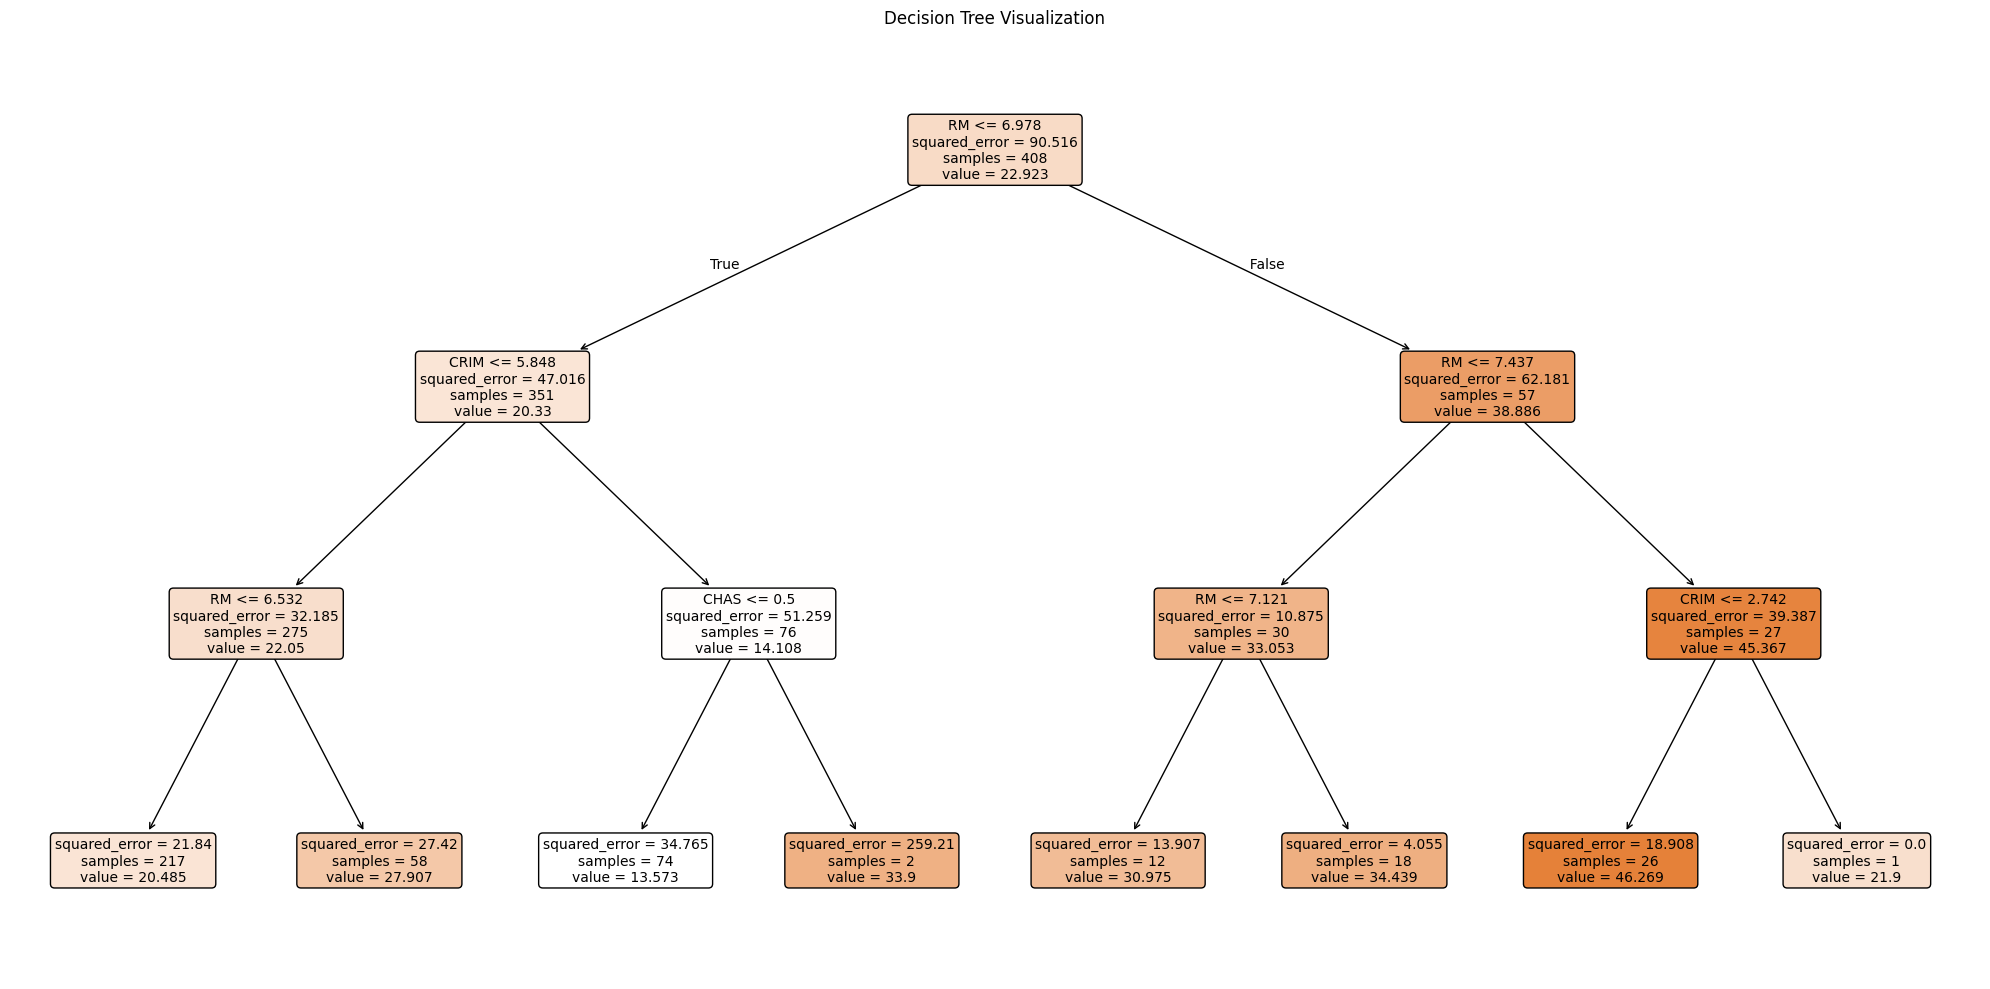

In [29]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True, fontsize=10)

plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()

|CRIM|TAX|RM|-|MEDV|
|-|-|-|-|-|
|3.2|6.9|7|-|20|
|0.2|3.2|9|-|60|

Depth 5 = 4350.22 MAE
Depth 6 = 4536.98 MAE

In [30]:
predictions = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: ${mae*1000:.2f}")
print(f"Mean Squared Error: ${mse*1000:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Absolute Error: $4414.89
Mean Squared Error: $55017.60
R-squared Score: 0.3580


In [31]:
depths = range(1, 6) # [1, 2, 3, 4, 5, 6, 7, 8]
avg_scores = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=seed)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X, y, cv = 5)

    # Get the average scores, add it to our list
    avg_scores.append(scores.mean())


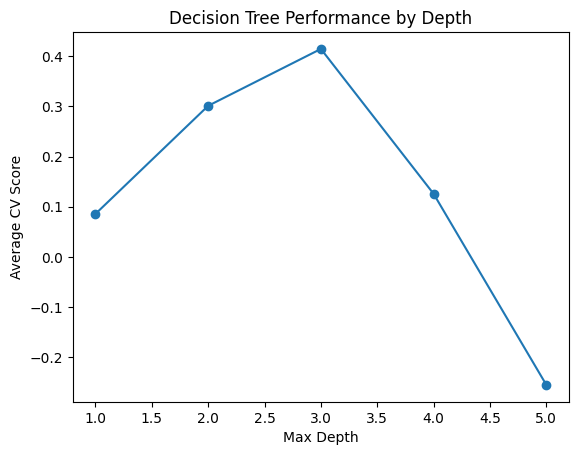

In [32]:
results_df = pd.DataFrame({
    'Depth': depth,
    'Average Score': avg_scores
})

plt.plot(depths, avg_scores, marker = 'o')
plt.title("Decision Tree Performance by Depth")
plt.xlabel('Max Depth')
plt.ylabel('Average CV Score')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=seed)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"The absolute error of my forest is: ${rf_mae*1000:.2f}")

The absolute error of my forest is: $3758.05


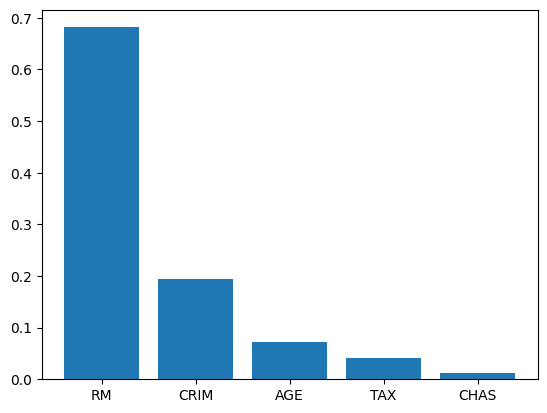

In [34]:
rf_features = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

features_sorted = rf_features.sort_values('importance', ascending=False)

plt.bar(features_sorted['feature'], features_sorted['importance'])
plt.show()